In [15]:
# Support Vector Machine (SVM)
#David Corzo, Anesveth Maatens, Gulio Valenzuela 

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('iris-data-clean.csv')
dataset = dataset.reset_index(drop=True)
dataset['class'] = dataset['class'].replace('Iris-setosa', 5)
dataset['class'] = dataset['class'].replace('Iris-versicolor', 6)
dataset['class'] = dataset['class'].replace('Iris-virginica', 7)
dataset['class'].astype('int')

X = dataset.iloc[:, [0, 1]].values
w = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
w_train, w_test, y_trainv2, y_testv2 = train_test_split(w, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
w_train = sc.fit_transform(w_train)
w_test = sc.transform(w_test)



In [17]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
classifier.fit(w_train, y_trainv2)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)
y_predv2 = classifier.predict(w_test)
print(y_predv2)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
cm2 = confusion_matrix(y_testv2, y_predv2)
print(cm2)

[6 6 5 5 6 7 6 6 6 7 7 5 6 6 5 6 6 6 7 7 6 5 6 6 6 6 6 6 7 7 6 5 6 6 7 5 6
 6]
[6 7 6 6 5 7 7 6 6 6 5 5 6 5 5 6 7 6 5 5 5 5 6 5 6 6 6 5 5 7 5 6 6 7 5 6 7
 6]
[[ 3  6  5]
 [ 3 10  1]
 [ 1  7  2]]
[[14  0  0]
 [ 0 13  1]
 [ 0  4  6]]


In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_testv2,y_predv2))

0.868421052631579


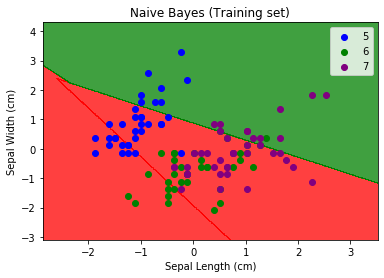

In [19]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('blue', 'green','purple'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

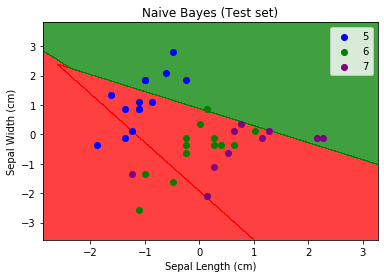

In [20]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('blue', 'green','purple'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

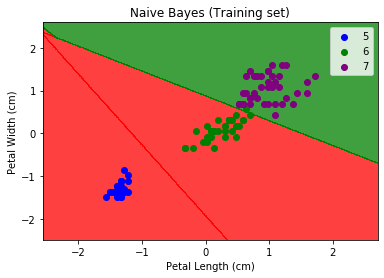

In [21]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = w_train, y_trainv2
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('blue', 'green','purple'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

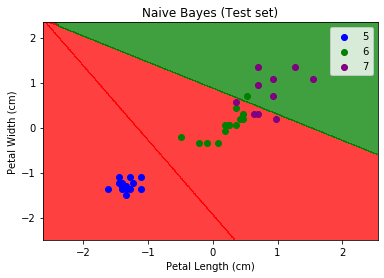

In [22]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = w_test, y_testv2
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('blue', 'green','purple'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()